In [60]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [5]:
advertising_multi=pd.read_csv("advertising.csv")

In [6]:
advertising_multi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
advertising_multi.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [8]:
advertising_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
advertising_multi.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

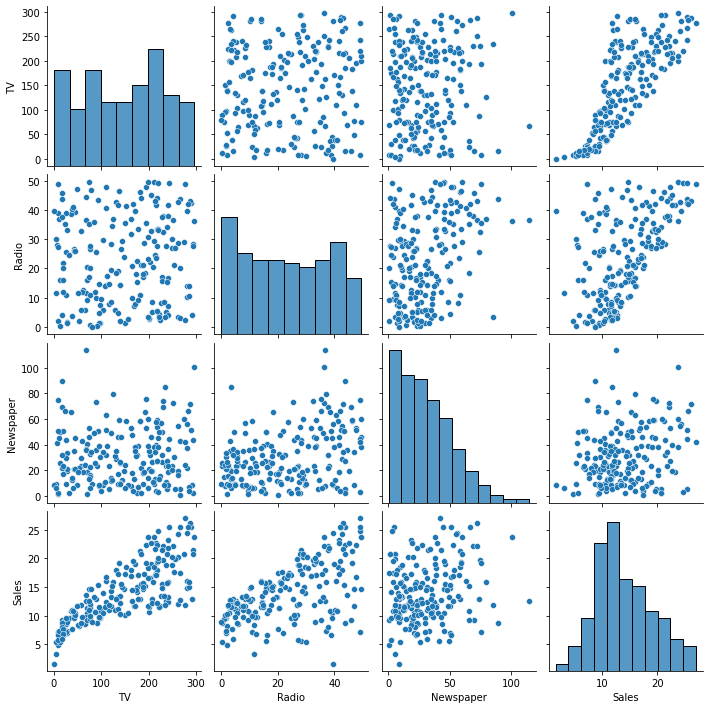

In [13]:
sns.pairplot(advertising_multi)

/home/sahitya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


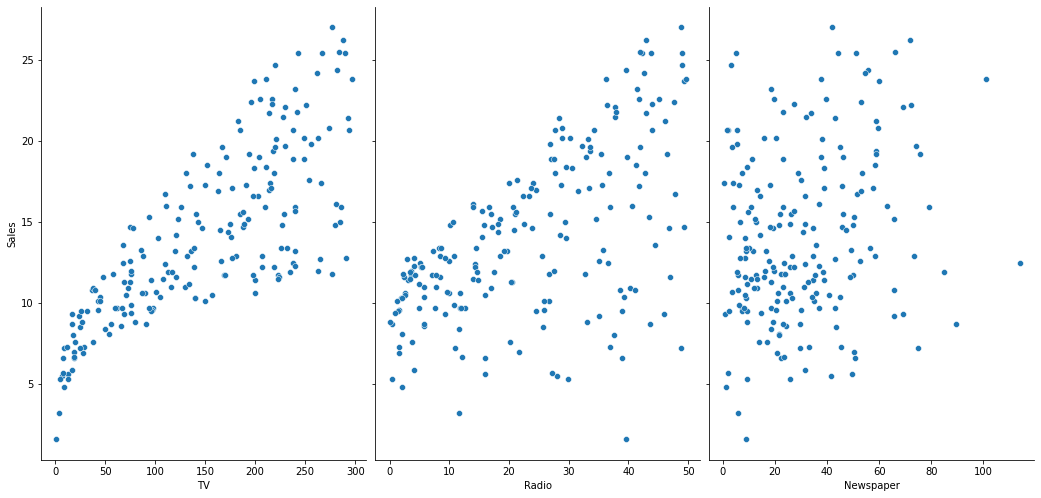

In [14]:
#visualizing th relationship b?features
sns.pairplot(advertising_multi,x_vars=["TV","Radio","Newspaper"],y_vars="Sales",size=7,aspect=0.7,kind="scatter")

In [15]:
#putting features variable to x
X=advertising_multi[["TV",'Radio',"Newspaper"]]
y=advertising_multi["Sales"]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,train_size=0.7,random_state=100)

In [20]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [21]:
print(lm.intercept_)

2.652789668879498


In [27]:
coeff_df=pd.DataFrame(lm.coef_,X_test.columns,columns=["coefficient"])

In [28]:
coeff_df

,coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


In [30]:
y_pred=lm.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r_squared=r2_score(y_test,y_pred)

In [33]:
print(f"mean_squared_error:{mse}")
print(f"r_squared_value:",r_squared)

mean_squared_error:1.8506819941636963
r_squared_value: 0.9058622107532246


In [34]:
#checking p_values by using stats Model
import statsmodels.api as sm
x_train_sm=X_train
x_train_sm=sm.add_constant(x_train_sm)
lm_1=sm.OLS(y_train,x_train_sm).fit()

In [36]:
lm_1.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [38]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           9.97e-66
Time:                        23:31:09   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

<AxesSubplot:>

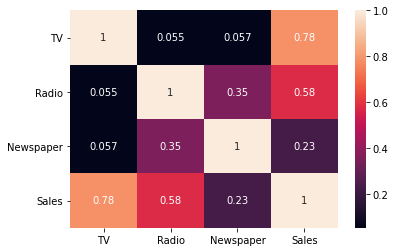

In [40]:
sns.heatmap(advertising_multi.corr(),annot=True)

In [41]:
#again implementing the result


In [42]:
x_train_new=X_train[["TV","Radio"]]
x_test_new=X_test[["TV","Radio"]]

In [43]:
lm.fit(x_train_new,y_train)

LinearRegression()

In [44]:
y_pred_new=lm.predict(x_test_new)

Text(0, 0.5, 'sales')

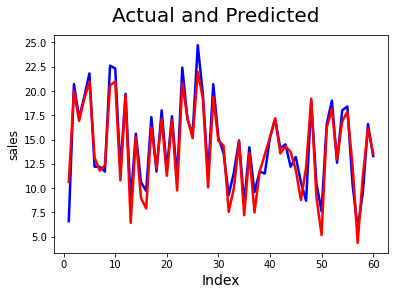

In [49]:
c=[i for i in range(1,len(X_test)+1,1)]
fig=plt.figure()
plt.plot(c,y_test,color="blue",linewidth=2.5,linestyle="-")
plt.plot(c,y_pred,color="red",linewidth=2.5,linestyle="-")
fig.suptitle("Actual and Predicted",fontsize=20)
plt.xlabel("Index",fontsize=14)
plt.ylabel("sales",fontsize=12)

Text(0, 0.5, 'y_test-y_pred')

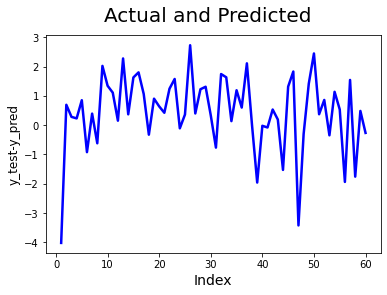

In [51]:
c=[i for i in range(1,len(X_test)+1,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred,color="blue",linewidth=2.5,linestyle="-")
fig.suptitle("Actual and Predicted",fontsize=20)
plt.xlabel("Index",fontsize=14)
plt.ylabel("y_test-y_pred",fontsize=12)

In [52]:
mse=mean_squared_error(y_test,y_pred_new)
r_squared=r2_score(y_test,y_pred_new)

In [53]:
print(f"mean_squared_error:{mse}")
print(f"r_squared_value:",r_squared)

mean_squared_error:1.7847400520902805
r_squared_value: 0.909216449171822


In [54]:
x_train_final=x_train_new
x_train_final=sm.add_constant(x_train_final)

In [55]:
lm_final=sm.OLS(y_train,x_train_final).fit()

In [56]:
print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           4.46e-67
Time:                        23:43:41   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

In [58]:
#Model refinment using RFE
from sklearn.feature_selection import RFE

In [61]:
rfe=RFE(lm,2)
rfe=rfe.fit(X_train,y_train)

In [62]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False]
[1 1 2]


In [ ]:
#Analysis for newspaper 

In [64]:
import pandas as pd
import numpy as np
# Importing dataset
advertising_multi = pd.read_csv('advertising.csv')

x_news = advertising_multi['Newspaper']

y_news = advertising_multi['Sales']

# Data Split

X_train, X_test, y_train, y_test = train_test_split(x_news, y_news, 
                                                    train_size=0.7 , 
                                                    random_state=110)

# Required only in the case of simple linear regression
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

# Linear regression from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fitting the model
lm.fit(X_train,y_train)

# Making predictions
y_pred = lm.predict(X_test)

# Importing mean square error and r square from sklearn library.
from sklearn.metrics import mean_squared_error, r2_score

# Computing mean square error and R square value
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Printing mean square error and R square value
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 23.84732008485191
r_square_value : 0.08182413570736657
